In [103]:
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from functools import reduce
import seaborn as sns

### LECTURA DATOS

In [985]:
#mysql_config = {
#    'host': 'localhost',
#    'user': 'root',
#    'database': 'cancer_mama'
#}

#conn_mysql = mysql.connector.connect(**mysql_config)
#cursor_mysql = conn_mysql.cursor()

#query = "SELECT * FROM tumor;"
#df_sql = pd.read_sql_query(query, conn_mysql)

In [986]:
# PARA MAC
# df_sql = pd.read_csv('./Datos/datos_sql.csv')
# df_sql = df_sql.drop('Unnamed: 0',axis=1)
# df_sql

In [150]:
df_csv1 = pd.read_csv('./Datos/patients_batch1.csv')
df_csv2 = pd.read_csv('./Datos/patients_batch2.csv')
df_excel = pd.read_excel('./Datos/gynecological.xlsx')
df_excel = df_excel.drop('Unnamed: 0', axis=1)
df_json = pd.read_json('./Datos/histochemistry.json')
df_sql = pd.read_csv('./Datos/datos_sql.csv')
df_sql = df_sql.drop('Unnamed: 0', axis=1)

# PREPROCESADO

### Preprocesado gynecological


In [151]:
df_excel

,ehr,pregnancy,birth,caesarean,abort,menarche_age,menopause_age
0,10011773,-8.0,0.0,NaN,0.0,NaN,71.0
1,10030299,3.0,NaN,0.0,0.0,NaN,NaN
2,10030824,0.0,0.0,0.0,NaN,NaN,44.0
3,10053435,2.0,NaN,0.0,1.0,21.0,74.0
4,10111454,0.0,-6.0,NaN,0.0,16.0,55.0
...,...,...,...,...,...,...,...
7681,99948591,9.0,2.0,-4.0,0.0,12.0,47.0
7682,99961100,2.0,2.0,0.0,0.0,19.0,52.0
7683,99981192,3.0,3.0,0.0,-5.0,11.0,NaN
7684,99992350,4.0,3.0,NaN,-6.0,11.0,55.0


In [152]:
df = df_excel
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7686 entries, 0 to 7685
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ehr            7686 non-null   int64  
 1   pregnancy      6413 non-null   float64
 2   birth          6417 non-null   float64
 3   caesarean      6131 non-null   float64
 4   abort          6235 non-null   float64
 5   menarche_age   4901 non-null   float64
 6   menopause_age  4486 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 420.5 KB


In [153]:
df.describe()

,ehr,pregnancy,birth,caesarean,abort,menarche_age,menopause_age
count,7.686000e+03,6413.000000,6417.000000,6131.000000,6235.000000,4901.000000,4486.000000
mean,5.505640e+07,2.078590,1.673991,0.029848,0.259984,12.736584,50.263041
std,2.621591e+07,3.052473,3.006228,2.677790,2.691482,3.062710,17.196300
min,1.001177e+07,-10.000000,-10.000000,-11.000000,-12.000000,0.000000,2.000000
25%,3.202165e+07,1.000000,0.000000,0.000000,0.000000,11.000000,44.000000
50%,5.503108e+07,2.000000,2.000000,0.000000,0.000000,13.000000,49.000000
75%,7.794185e+07,3.000000,3.000000,0.000000,1.000000,14.000000,53.000000
max,9.999442e+07,14.000000,15.000000,12.000000,12.000000,26.000000,145.000000


Denotamos , que hay valores atípicos y que no concuerdan en las columnas, como por ejemplo el caso de pregancy, birth... que denotan valores mínimos de -20 y de -18, respectivamente. Por ello, vamos a realizar una Exploración inicial

In [154]:
df.isnull().sum()

ehr                 0
pregnancy        1273
birth            1269
caesarean        1555
abort            1451
menarche_age     2785
menopause_age    3200
dtype: int64

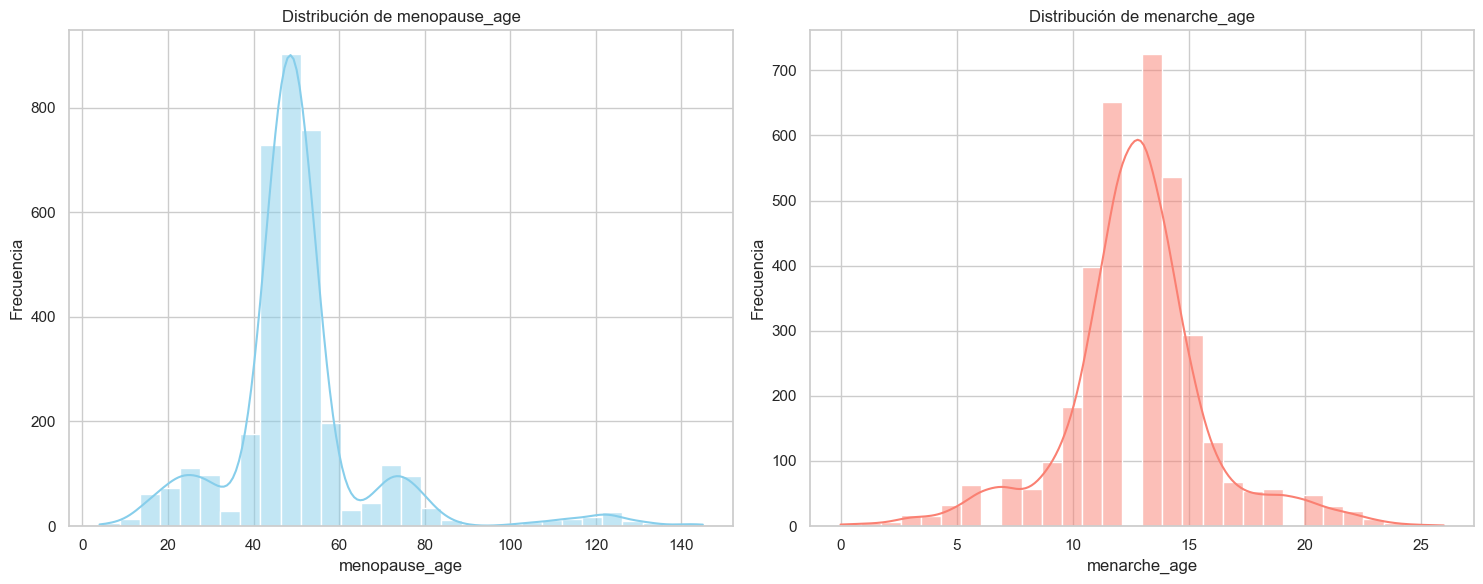

In [155]:
import matplotlib.pyplot as plt
import seaborn as sns

# Supongamos que tu DataFrame se llama df
# Filtra los valores nulos antes de visualizar
df_filtrado = df[['menopause_age', 'menarche_age']].dropna()

# Configura el estilo de Seaborn para gráficos más atractivos
sns.set(style="whitegrid")

# Crea una figura con dos subgráficos
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

# Subgráfico 1: menopause_age
sns.histplot(df_filtrado['menopause_age'], kde=True, bins=30, color='skyblue', ax=axes[0])
axes[0].set_title('Distribución de menopause_age')
axes[0].set_xlabel('menopause_age')
axes[0].set_ylabel('Frecuencia')

# Subgráfico 2: menarche_age
sns.histplot(df_filtrado['menarche_age'], kde=True, bins=30, color='salmon', ax=axes[1])
axes[1].set_title('Distribución de menarche_age')
axes[1].set_xlabel('menarche_age')
axes[1].set_ylabel('Frecuencia')

# Ajusta el diseño de la figura
plt.tight_layout()
plt.show()


**Imputación con la Media:**

- Ventajas:
    - Apropiada para variables con distribución simétrica.
    - Puede ser más sensible a cambios en los valores extremos (outliers).
- Desventajas:
    - Sensible a los outliers: si tienes valores extremos, la media puede sesgarse.
    - No es robusta: puede no ser representativa si la distribución no es simétrica.

**Imputación con la Mediana:**

- Ventajas:
    - Robusta a valores extremos: la mediana es menos sensible a los outliers.
    - Apropiada para variables con distribuciones sesgadas.
- Desventajas:
    - Menos eficiente cuando la distribución es aproximadamente simétrica.

**¿Cuándo elegir la Media o la Mediana?**

- Distribución Simétrica:
    - Si la variable sigue una distribución normal o aproximadamente normal, la media puede ser una elección razonable.

Debido a que no tenemos más información sobre menarche_age, edad de la primera menstruación , tomando referencias algunos estudios , se dice que la edad media es en torno a los 12 años, en eras de ellos, vamos a considerar valores entre 10 y 20 años , el resto los imputamos a nulos y posteriormente imputaremos los nulos con la media de los valores que tengamos, decidimos la media porque la distrubucción parece *SIMÉTRICA*. Es por ello, que consideramos valores menores a 10 y mayores a 20 como datos atípicos o que principalmente hayan sido tomados de manera errónea.

In [156]:
# Utiliza value_counts() para contar cuántas veces aparece cada valor en "menarche_age"
conteo_menarche_age = df['menarche_age'].value_counts()
conteo_menarche_age

menarche_age
13.0    1005
12.0     872
14.0     731
11.0     571
15.0     403
10.0     254
16.0     182
9.0      131
17.0      93
7.0       91
6.0       81
8.0       81
18.0      80
19.0      71
20.0      58
5.0       45
21.0      40
22.0      28
4.0       26
3.0       17
23.0      14
2.0        8
1.0        6
24.0       5
0.0        4
25.0       3
26.0       1
Name: count, dtype: int64

In [157]:
# Establecer como NaN los valores menores que 10 o mayores que 20
df.loc[(df['menarche_age'] < 10) | (df['menarche_age'] > 20), 'menarche_age'] = pd.NA

# Imputar los valores nulos con la mediana
mediana_menarche_age = df['menarche_age'].mean()
mediana_menarche_age_int = round(mediana_menarche_age)  # Redondear a entero
df['menarche_age'].fillna(mediana_menarche_age_int, inplace=True)

df

,ehr,pregnancy,birth,caesarean,abort,menarche_age,menopause_age
0,10011773,-8.0,0.0,NaN,0.0,13.0,71.0
1,10030299,3.0,NaN,0.0,0.0,13.0,NaN
2,10030824,0.0,0.0,0.0,NaN,13.0,44.0
3,10053435,2.0,NaN,0.0,1.0,13.0,74.0
4,10111454,0.0,-6.0,NaN,0.0,16.0,55.0
...,...,...,...,...,...,...,...
7681,99948591,9.0,2.0,-4.0,0.0,12.0,47.0
7682,99961100,2.0,2.0,0.0,0.0,19.0,52.0
7683,99981192,3.0,3.0,0.0,-5.0,11.0,NaN
7684,99992350,4.0,3.0,NaN,-6.0,11.0,55.0


En el caso de la menopausia, llevamos a cabo una situación similar, estudios confirman que la edad media a la que esto ocurre son los 50 años, variando entre los 45 y 55 años según factores ambientales y genéticos, y se considera menopausia precoz cuando ocurre antes de los 45 años siendo en ese caso tributaria de tratamiento hormonal.

Por ello, nosotros vamos a considerar esencialmente un rango desde los 37 hasta los 62, dentro de este rango se tomarán esos valores, imputando el resto a nulos y posteriormente con la mediana de la columna asociada, es decir, siguiendo un enfoque similar al anterior

In [158]:
# Utiliza value_counts() para contar cuántas veces aparece cada valor en "menarche_age"
conteo_menopause_age = df['menopause_age'].value_counts()
conteo_menopause_age

menopause_age
48.0     310
49.0     294
47.0     283
46.0     255
52.0     253
        ... 
85.0       1
110.0      1
5.0        1
4.0        1
2.0        1
Name: count, Length: 126, dtype: int64

In [159]:
# Establecer como NaN los valores menores que 10 o mayores que 20
df.loc[(df['menopause_age'] < 37) | (df['menopause_age'] > 62), 'menopause_age'] = pd.NA

# Imputar los valores nulos con la mediana
mediana_menarche_age = df['menopause_age'].median()
df['menopause_age'].fillna(mediana_menarche_age, inplace=True)
df
#Es lógico, puesto que la mediana sale aproximadamente 49 lo que nos puede servir.

,ehr,pregnancy,birth,caesarean,abort,menarche_age,menopause_age
0,10011773,-8.0,0.0,NaN,0.0,13.0,49.0
1,10030299,3.0,NaN,0.0,0.0,13.0,49.0
2,10030824,0.0,0.0,0.0,NaN,13.0,44.0
3,10053435,2.0,NaN,0.0,1.0,13.0,49.0
4,10111454,0.0,-6.0,NaN,0.0,16.0,55.0
...,...,...,...,...,...,...,...
7681,99948591,9.0,2.0,-4.0,0.0,12.0,47.0
7682,99961100,2.0,2.0,0.0,0.0,19.0,52.0
7683,99981192,3.0,3.0,0.0,-5.0,11.0,49.0
7684,99992350,4.0,3.0,NaN,-6.0,11.0,55.0


In [160]:
df.isnull().sum()

ehr                 0
pregnancy        1273
birth            1269
caesarean        1555
abort            1451
menarche_age        0
menopause_age       0
dtype: int64

Vemos, que hay una cantidad de valores nulos asociados a cada una de las columnas, denotamos también datos en los que se han tomado medidas de embarazo mínimas, en eras de llevar a cabo dicha imputación se decide poner a NULOS aquellos valores de las columnas  'birth', 'caesarean', 'pregnancy', 'abort' , puesto que se consideran como valores tomados de manera errónea y que afectarían al modelo o el propósito general, así aumentaremos el nº de nulos pero llevando a cabo un tratamiento más exhaustivo más adelante.

In [161]:

# Lista de columnas a imputar
columnas_a_imputar = ['birth', 'caesarean', 'pregnancy', 'abort']

# Itera sobre las columnas y aplica la imputación
for columna in columnas_a_imputar:
    # Imputa los valores negativos con NaN
    df.loc[df[columna] < 0, columna] = pd.NA

In [162]:
df.isnull().sum()

ehr                 0
pregnancy        1858
birth            1878
caesarean        2222
abort            2068
menarche_age        0
menopause_age       0
dtype: int64

In [163]:
df

,ehr,pregnancy,birth,caesarean,abort,menarche_age,menopause_age
0,10011773,NaN,0.0,NaN,0.0,13.0,49.0
1,10030299,3.0,NaN,0.0,0.0,13.0,49.0
2,10030824,0.0,0.0,0.0,NaN,13.0,44.0
3,10053435,2.0,NaN,0.0,1.0,13.0,49.0
4,10111454,0.0,NaN,NaN,0.0,16.0,55.0
...,...,...,...,...,...,...,...
7681,99948591,9.0,2.0,NaN,0.0,12.0,47.0
7682,99961100,2.0,2.0,0.0,0.0,19.0,52.0
7683,99981192,3.0,3.0,0.0,NaN,11.0,49.0
7684,99992350,4.0,3.0,NaN,NaN,11.0,55.0


In [164]:
df['pregnancy'].fillna(df['birth'] + df['caesarean'] + df['abort'], inplace=True)


df['birth'].fillna(df['pregnancy'] - df['caesarean'] - df['abort'], inplace=True)

# Imputa los valores nulos en "caesarean" con la diferencia entre "pregnancy" y la suma de "birth" y "abort"
df['caesarean'].fillna(df['pregnancy'] - df['birth'] - df['abort'], inplace=True)

# Imputa los valores nulos en "abort" con la diferencia entre "pregnancy" y la suma de "birth" y "caesarean"
df['abort'].fillna(df['pregnancy'] - df['birth'] - df['caesarean'], inplace=True)


In [167]:
df.isnull().sum()

ehr                 0
pregnancy        1033
birth            1033
caesarean        1365
abort            1245
menarche_age        0
menopause_age       0
dtype: int64

In [168]:
import pandas as pd

# Supongamos que tu DataFrame se llama df

# Verifica si todos los valores en "pregnancy" son iguales a la suma de "birth", "caesarean" y "abort"
verificacion_pregnancy = (df['pregnancy'] == df[['birth', 'caesarean', 'abort']].sum(axis=1)).all()

# Verifica si todos los valores en "birth" son iguales a la suma de "caesarean" y "abort"
verificacion_birth = (df['birth'] == df['caesarean'] + df['abort']).all()

# Verifica si todos los valores en "caesarean" son iguales a la diferencia entre "pregnancy" y la suma de "birth" y "abort"
verificacion_caesarean = (df['caesarean'] == df['pregnancy'] - df['birth'] - df['abort']).all()

# Verifica si todos los valores en "abort" son iguales a la diferencia entre "pregnancy" y la suma de "birth" y "caesarean"
verificacion_abort = (df['abort'] == df['pregnancy'] - df['birth'] - df['caesarean']).all()

# Imprime los resultados de las verificaciones
print(f"Verificación de 'pregnancy': {verificacion_pregnancy}")
print(f"Verificación de 'birth': {verificacion_birth}")
print(f"Verificación de 'caesarean': {verificacion_caesarean}")
print(f"Verificación de 'abort': {verificacion_abort}")


Verificación de 'pregnancy': False
Verificación de 'birth': False
Verificación de 'caesarean': False
Verificación de 'abort': False


In [171]:
import pandas as pd

# Supongamos que tu DataFrame se llama df

# Verifica si todos los valores en "pregnancy" son iguales a la suma de "birth", "caesarean" y "abort"
df['verificacion_pregnancy'] = df['pregnancy'] == df[['birth', 'caesarean', 'abort']].sum(axis=1)

# Verifica si todos los valores en "birth" son iguales a la suma de "caesarean" y "abort"
df['verificacion_birth'] = df['birth'] == df['caesarean'] + df['abort']

# Verifica si todos los valores en "caesarean" son iguales a la diferencia entre "pregnancy" y la suma de "birth" y "abort"
df['verificacion_caesarean'] = df['caesarean'] == df['pregnancy'] - df['birth'] - df['abort']

# Verifica si todos los valores en "abort" son iguales a la diferencia entre "pregnancy" y la suma de "birth" y "caesarean"
df['verificacion_abort'] = df['abort'] == df['pregnancy'] - df['birth'] - df['caesarean']

# Identifica las filas que no cumplen las condiciones
filas_no_cumplen = df[df[['verificacion_pregnancy', 'verificacion_birth', 'verificacion_caesarean', 'verificacion_abort']].any(axis=1) == False]

# Identifica las filas que cumplen todas las condiciones
filas_cumplen = df[df[['verificacion_pregnancy', 'verificacion_birth', 'verificacion_caesarean', 'verificacion_abort']].all(axis=1)]


In [172]:
filas_cumplen

,ehr,pregnancy,birth,caesarean,abort,menarche_age,menopause_age,verificacion_pregnancy,verificacion_birth,verificacion_caesarean,verificacion_abort
2,10030824,0.0,0.0,0.0,0.0,13.0,44.0,True,True,True,True
3,10053435,2.0,1.0,0.0,1.0,13.0,49.0,True,True,True,True
17,10190493,0.0,0.0,0.0,0.0,13.0,49.0,True,True,True,True
36,10379060,0.0,0.0,0.0,0.0,13.0,49.0,True,True,True,True
38,10424469,4.0,2.0,0.0,2.0,13.0,49.0,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...
7624,99275269,0.0,0.0,0.0,0.0,15.0,49.0,True,True,True,True
7643,99432623,4.0,2.0,0.0,2.0,15.0,47.0,True,True,True,True
7646,99458848,2.0,1.0,0.0,1.0,15.0,49.0,True,True,True,True
7650,99533859,0.0,0.0,0.0,0.0,13.0,46.0,True,True,True,True


In [173]:
filas_no_cumplen

,ehr,pregnancy,birth,caesarean,abort,menarche_age,menopause_age,verificacion_pregnancy,verificacion_birth,verificacion_caesarean,verificacion_abort
0,10011773,NaN,0.0,NaN,0.0,13.0,49.0,False,False,False,False
10,10141661,0.0,0.0,5.0,0.0,13.0,49.0,False,False,False,False
11,10144916,NaN,NaN,0.0,1.0,14.0,49.0,False,False,False,False
13,10165941,4.0,4.0,0.0,7.0,13.0,49.0,False,False,False,False
18,10194783,5.0,NaN,2.0,NaN,13.0,49.0,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
7672,99812629,1.0,NaN,NaN,0.0,13.0,49.0,False,False,False,False
7674,99834449,3.0,NaN,NaN,NaN,13.0,49.0,False,False,False,False
7680,99948515,7.0,2.0,0.0,0.0,11.0,49.0,False,False,False,False
7684,99992350,4.0,3.0,NaN,NaN,11.0,55.0,False,False,False,False


In [174]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Supongamos que df_cumplen es el DataFrame con las filas que cumplen
columnas_predictoras = ['birth', 'caesarean', 'abort']
columna_objetivo = 'pregnancy'

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    filas_cumplen[columnas_predictoras],  # Variables predictoras
    filas_cumplen[columna_objetivo],  # Variable objetivo
    test_size=0.2, random_state=42
)

# Crear y entrenar un modelo de regresión lineal
modelo = LinearRegression()
modelo.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = modelo.predict(X_test)

# Evaluar el rendimiento del modelo
mse = mean_squared_error(y_test, y_pred)
print(f"Error cuadrático medio en el conjunto de prueba: {mse}")

# Ahora el modelo está entrenado y puedes usarlo para predecir "pregnancy" en filas que no cumplen las condiciones


Error cuadrático medio en el conjunto de prueba: 9.483455131186237e-31


In [178]:
df.isnull().sum()


ehr                          0
pregnancy                 1033
birth                     1033
caesarean                 1365
abort                     1245
menarche_age                 0
menopause_age                0
verificacion_pregnancy       0
verificacion_birth           0
verificacion_caesarean       0
verificacion_abort           0
dtype: int64

### Preprocesado patients_batch1/patients_batch2

Los datos de los pacientes vienen dados en batch distintos recopilados en momentos diferentes. Entonces, primero ponemos en el mismo formato de manera individual los dos csv y después haremos un merge para unirlos en uno solo

In [999]:
df_csv1

,ehr,birth_date,diagnosis_date,death_date
0,10011773,1959-07-05,2015-04-02,NaN
1,10020495,1953-10-02,2017-12-04,NaN
2,10030299,1966-08-16,2019-06-27,NaN
3,10030824,1953-03-03,2018-09-07,NaN
4,10041592,1959-07-06,2018-11-19,NaN
...,...,...,...,...
7495,77575810,1958-03-21,2014-02-22,NaN
7496,77578551,1948-05-18,2018-07-11,NaN
7497,77579212,1976-02-13,2022-03-22,NaN
7498,77605742,1950-03-16,2015-06-29,NaN


In [1000]:
# Convertir las columnas objeto al formato datetime
df_csv1['birth_date'] = pd.to_datetime(df_csv1['birth_date'], format='%Y-%m-%d', errors='coerce')
df_csv1['diagnosis_date'] = pd.to_datetime(df_csv1['diagnosis_date'], format='%Y-%m-%d', errors='coerce')
df_csv1['death_date'] = pd.to_datetime(df_csv1['death_date'],format='%Y-%m-%d', errors='coerce')

# Cambiamos los formatos a '%d/%m/%Y'
df_csv1['birth_date'] = df_csv1['birth_date'].dt.strftime('%d-%m-%Y')
df_csv1['diagnosis_date'] = df_csv1['diagnosis_date'].dt.strftime('%d-%m-%Y')
df_csv1['death_date'] = df_csv1['death_date'].dt.strftime('%d-%m-%Y')

df_csv1

,ehr,birth_date,diagnosis_date,death_date
0,10011773,05-07-1959,02-04-2015,NaN
1,10020495,02-10-1953,04-12-2017,NaN
2,10030299,16-08-1966,27-06-2019,NaN
3,10030824,03-03-1953,07-09-2018,NaN
4,10041592,06-07-1959,19-11-2018,NaN
...,...,...,...,...
7495,77575810,21-03-1958,22-02-2014,NaN
7496,77578551,18-05-1948,11-07-2018,NaN
7497,77579212,13-02-1976,22-03-2022,NaN
7498,77605742,16-03-1950,29-06-2015,NaN


In [1001]:
df_csv2

,ehr,birth_date,diagnosis_date,death_date
0,72992494,13/02/1942,08/05/2018,NaN
1,73002338,22/10/1949,08/09/2018,NaN
2,73008149,04/12/1969,12/04/2018,NaN
3,73012939,18/09/1973,17/04/2014,01/01/2018
4,73019870,07/12/1955,24/05/2018,NaN
...,...,...,...,...
2995,99966287,16/12/1978,02/08/2018,NaN
2996,99981192,10/04/1949,28/10/2017,NaN
2997,99988958,21/01/1966,27/05/2013,NaN
2998,99992350,04/09/1939,17/12/2018,NaN


In [1002]:
# Convertir las columnas objeto al formato datetime
df_csv2['birth_date'] = pd.to_datetime(df_csv2['birth_date'], format='%d/%m/%Y', errors='coerce')
df_csv2['diagnosis_date'] = pd.to_datetime(df_csv2['diagnosis_date'], format='%d/%m/%Y', errors='coerce')
df_csv2['death_date'] = pd.to_datetime(df_csv2['death_date'], format='%d/%m/%Y', errors='coerce')

# Cambiamos los formatos a '%d/%m/%Y'
df_csv2['birth_date'] = df_csv2['birth_date'].dt.strftime('%d-%m-%Y')
df_csv2['diagnosis_date'] = df_csv2['diagnosis_date'].dt.strftime('%d-%m-%Y')
df_csv2['death_date'] = df_csv2['death_date'].dt.strftime('%d-%m-%Y')

df_csv2

,ehr,birth_date,diagnosis_date,death_date
0,72992494,13-02-1942,08-05-2018,NaN
1,73002338,22-10-1949,08-09-2018,NaN
2,73008149,04-12-1969,12-04-2018,NaN
3,73012939,18-09-1973,17-04-2014,01-01-2018
4,73019870,07-12-1955,24-05-2018,NaN
...,...,...,...,...
2995,99966287,16-12-1978,02-08-2018,NaN
2996,99981192,10-04-1949,28-10-2017,NaN
2997,99988958,21-01-1966,27-05-2013,NaN
2998,99992350,04-09-1939,17-12-2018,NaN


Ya tenemos los dos df con el mismo formato individualmente, ahora realizamos un merge para juntar los dos

In [1003]:
df_csv = pd.merge(df_csv1, df_csv2, on=['ehr','birth_date','diagnosis_date','death_date'], how='outer')
df_csv

,ehr,birth_date,diagnosis_date,death_date
0,10011773,05-07-1959,02-04-2015,NaN
1,10020495,02-10-1953,04-12-2017,NaN
2,10030299,16-08-1966,27-06-2019,NaN
3,10030824,03-03-1953,07-09-2018,NaN
4,10041592,06-07-1959,19-11-2018,NaN
...,...,...,...,...
9995,99966287,16-12-1978,02-08-2018,NaN
9996,99981192,10-04-1949,28-10-2017,NaN
9997,99988958,21-01-1966,27-05-2013,NaN
9998,99992350,04-09-1939,17-12-2018,NaN


Podemos observar que nuestro nuevo dataframe tiene solo 10000, cuando nuestros dos batch suman 10500 (7500 y 3000 respectivamente). Podemos deducir que había filas con pacientes duplicados, y como hemos realizado el merge con 'outer' estos valores no han sido duplicados, ya que poseían los mismos datos, sino que solo se ha añadido uno.

Para probar que nuestra teoría es cierta, verificamos que no hay nulos en nuestro nuevo dataframe.

In [1004]:
df_csv['ehr'].duplicated().any()

False

Nos devuelve 'False', por lo tanto, verificamos nuestra teoría.

Ahora vamos a realizar un pequeño análisis de cada una de las variables.

In [1005]:
df_csv.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   ehr             10000 non-null  int64 
 1   birth_date      10000 non-null  object
 2   diagnosis_date  10000 non-null  object
 3   death_date      1135 non-null   object
dtypes: int64(1), object(3)
memory usage: 390.6+ KB


Observamos que en nuestro dataset de csv tenemos variables de tipo int64 y object; El identificador del paciente tendrá valor numérico, y luego el resto de variables (birth_date, diagnosis_date, death_date) con formato de objeto.

Tambien podemos observar gracias a la columna Non-Null Count, que de las variables birth_date y diagnosis_date no tenemos ningun valor nulo (ya que tenemos 10000 valores no nulos). 

Sin embargo, en la columna death_date si que tenemos nulos. Vamos a realizar un recuento de valores para esa columna para ver cuantos pacientes han fallecido de nuestro conjunto de datos

In [1006]:
valores = df_csv['death_date'].count()
valores

1135

In [1007]:
valores = df_csv['death_date'].isnull().sum()
valores

8865

Vemos que  hay 1135 pacientes que han fallecido, y 8865 pacientes se encuentran estables.

Una vez que tenemos todos los pacientes correctamente, vamos a comprobar que las fechas de los pacientes entran en los rangos correctos:
- Dia: [1:31]
- Mes: [1:12]

Empezamos comprobando que el rango de los días es el correcto:

In [1008]:
columnas = ['birth_date', 'diagnosis_date', 'death_date']

for i in columnas:
    # Especifico el rango
    rango_días = (
        pd.to_datetime(df_csv[i], format='%d-%m-%Y', errors='coerce').dt.day < 1
        | (pd.to_datetime(df_csv[i], format='%d-%m-%Y', errors='coerce').dt.day > 31)
    )

    filas_fuera_de_rango = df_csv[rango_días]

    if not filas_fuera_de_rango.empty:
        print(f"Filas con días fuera del rango en {i}:")
        print(filas_fuera_de_rango)
    else:
        print(f"Todos los días en {i} están dentro del rango.")

Todos los días en birth_date están dentro del rango.
Todos los días en diagnosis_date están dentro del rango.
Todos los días en death_date están dentro del rango.


Comprobamos ahora el rango de los meses:

In [1009]:
columnas = ['birth_date', 'diagnosis_date', 'death_date']

for i in columnas:
    # Especifico el rango
    rango_mes = (
        pd.to_datetime(df_csv[i], format='%d-%m-%Y', errors='coerce').dt.month < 1
        | (pd.to_datetime(df_csv[i], format='%d-%m-%Y', errors='coerce').dt.month > 12)
    )

    filas_fuera_de_rango = df_csv[rango_mes]

    if not filas_fuera_de_rango.empty:
        print(f"Filas con días fuera del rango en {i}:")
        print(filas_fuera_de_rango)
    else:
        print(f"Todos los días en {i} están dentro del rango.")

Todos los días en birth_date están dentro del rango.
Todos los días en diagnosis_date están dentro del rango.
Todos los días en death_date están dentro del rango.


Por lo tanto, podemos concluir que tenemos todos los datos en el mismo formato, y con los valores correctos. Es decir, no tenemos ninguna fecha mal puesta

### Preprocesado histochemistry

In [1010]:
df_json

,ehr,er,her2,ki67,pr
0,10011773,0.0,0.0,19.0,NaN
1,10020495,1.0,0.0,9.0,0.0
2,10030299,1.0,NaN,18.0,1.0
3,10030824,1.0,0.0,NaN,1.0
4,10041592,0.0,0.0,65.0,0.0
...,...,...,...,...,...
9995,99966287,1.0,0.0,NaN,0.0
9996,99981192,1.0,0.0,14.0,0.0
9997,99988958,NaN,0.0,67.0,NaN
9998,99992350,0.0,0.0,16.0,0.0


Lo pasamos a formato csv para poder estudiar los datos más fácilmente, y lo guardamos como 'datos_json.csv'

In [1011]:
df_json.to_csv('datos_json.csv',)
df_json

,ehr,er,her2,ki67,pr
0,10011773,0.0,0.0,19.0,NaN
1,10020495,1.0,0.0,9.0,0.0
2,10030299,1.0,NaN,18.0,1.0
3,10030824,1.0,0.0,NaN,1.0
4,10041592,0.0,0.0,65.0,0.0
...,...,...,...,...,...
9995,99966287,1.0,0.0,NaN,0.0
9996,99981192,1.0,0.0,14.0,0.0
9997,99988958,NaN,0.0,67.0,NaN
9998,99992350,0.0,0.0,16.0,0.0


Al igual que hemos realizado con el preprocesado de los datos de los pacientes, comprobamos si tenemos identificadores duplicados

In [1012]:
df_json['ehr'].duplicated().any()

False

In [1013]:
df_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ehr     10000 non-null  int64  
 1   er      9042 non-null   float64
 2   her2    9006 non-null   float64
 3   ki67    9032 non-null   float64
 4   pr      9018 non-null   float64
dtypes: float64(4), int64(1)
memory usage: 390.8 KB


Observamos que tenemos todos los datos de tipo numérico. El identificador del paciente (ehr) de tipo int, y el resto de variables como float

Mostramos ahora cuantos nulos hay por columna

In [1014]:
nulos = df_json.isnull()

num_nulos_por_columna = nulos.sum()

print("Número de valores nulos por columna:")
print(num_nulos_por_columna)

Número de valores nulos por columna:
ehr       0
er      958
her2    994
ki67    968
pr      982
dtype: int64


Tenemos bastantes valores nulos por columna. Vamos a realizar un pequeño análisis de los nulos que tenemos

In [1015]:
# Porcentaje de valores nulos por columna
porcentaje = (df_json.isnull().mean() * 100).round(2)
porcentaje

ehr     0.00
er      9.58
her2    9.94
ki67    9.68
pr      9.82
dtype: float64

Obtenemos unos porcentajes bastante bajos, ninguno llega al 10% de los datos que tenemos. Por lo tanto podemos decir, que la cantidad de datos nulos que tenemos es bastante pequeña

Calculamos la matriz de correlación para ver si existe alguna correlación entre las variables

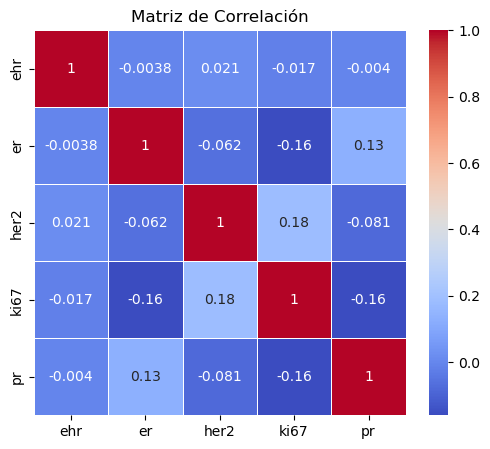

In [1016]:
# Calcular la matriz de correlación
matriz_correlacion = df_json.corr()

plt.figure(figsize=(6, 5))
sns.heatmap(matriz_correlacion, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Matriz de Correlación')
plt.show()

Observamos que no hay ningún tipo de correlación entre las variables dadas. De hecho, la mayoría tienen una mínima correlación negativa. 

Como no existe ningún tipo de correlación entre las variables, hemos decidido imputar los nulos por el valor más común de dicha columna.
Para ello calculamos por cada columna su moda, y elegimos el primer valor (es decir, el más común) y lo reemplazamos por los nulos de dicha columna

In [1017]:
# Imputación de er y pr con el valor más común
df_json['er'].fillna(df_json['er'].mode()[0], inplace=True)
df_json['pr'].fillna(df_json['pr'].mode()[0], inplace=True)

# Imputación de her2 y ki67 con el valor más común
df_json['her2'].fillna(df_json['her2'].mode()[0], inplace=True)

En cuanto a la columna 'ki67' como no es una columna binaria, sino que son porcentajes. Buscaremos una estrategia que cuadre mejor

Antes de anda, haremos un histograma para ver que rango de valores toma esta variable

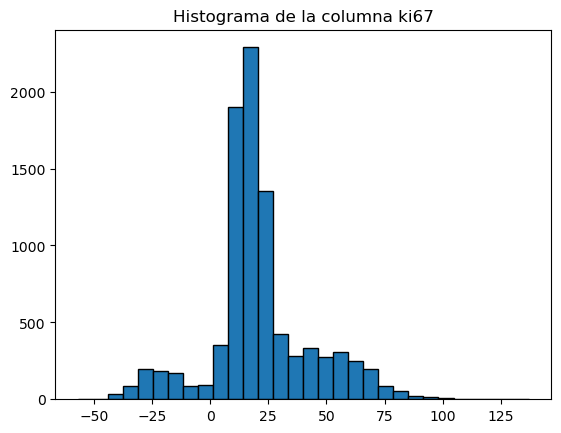

In [1018]:
plt.hist(df_json['ki67'], bins=30, edgecolor='black')
plt.title('Histograma de la columna ki67')
plt.show()

Como podemos observar, tenemos varios valores menores que 0, es decir, que tienen porcentaje negativo. Un valor negativo para el índice de proliferación del tumor (ki67) es erróneo y podría ser un error en los datos o en la recopilación de los mismos. 
Asimismo, también tenemos valores mayores que 100.

De tal manera, que imputaremos estos valores negativos como 0 y los valores mayores que 100 como 100. Y volvemos a mostrar el histograma

In [1019]:
df_json['ki67'] = df_json['ki67'].apply(lambda x: 0 if x < 0 else x)
df_json['ki67'] = df_json['ki67'].apply(lambda x: 100 if x > 100 else x)

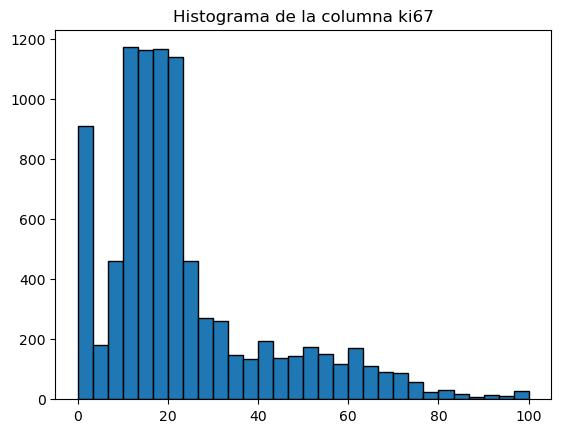

In [1020]:
plt.hist(df_json['ki67'], bins=30, edgecolor='black')
plt.title('Histograma de la columna ki67')
plt.show()

Ahora que tenemos todos los datos del índice de proliferación del tumor en un rango correcto (0,100), damos paso a la decisión de la estrategia de imputación de los nulos. 

Para ellos realizamos un boxplot para ver si tenemos muchos datos atípicos

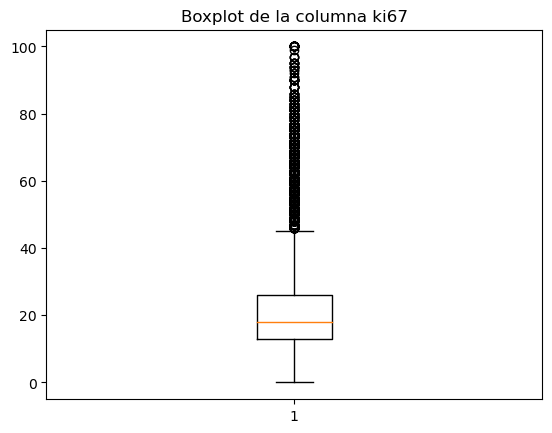

In [1028]:
plt.boxplot(df_json['ki67'])
plt.title('Boxplot de la columna ki67')
plt.show()

Como podemos observar tanto en el histograma como en el boxplot, tenemos bastantes datos atípicos, por lo tanto, imputar los nulos según la media sería desacertado ya que es bastante sensible a los datos atípicos. 

Por lo tanto, decidimos imputarlo según la mediana

In [1022]:
mediana = df_json['ki67'].median()
mediana

18.0

In [1023]:
df_json['ki67'].fillna(mediana, inplace=True)

In [1024]:
df_json

,ehr,er,her2,ki67,pr
0,10011773,0.0,0.0,19.0,1.0
1,10020495,1.0,0.0,9.0,0.0
2,10030299,1.0,0.0,18.0,1.0
3,10030824,1.0,0.0,18.0,1.0
4,10041592,0.0,0.0,65.0,0.0
...,...,...,...,...,...
9995,99966287,1.0,0.0,18.0,0.0
9996,99981192,1.0,0.0,14.0,0.0
9997,99988958,1.0,0.0,67.0,1.0
9998,99992350,0.0,0.0,16.0,0.0


In [1025]:
nulos = df_json.isnull()

num_nulos_por_columna = nulos.sum()

print("Número de valores nulos por columna:")
print(num_nulos_por_columna)

Número de valores nulos por columna:
ehr     0
er      0
her2    0
ki67    0
pr      0
dtype: int64


De esta manera, hemos imputado todos los nulos. Y tenemos los datos listos para el análisis de los mismos

### Preprocesado datos_sql.csv

In [1026]:
df_sql.to_csv('datos_sql.csv',)

In [1027]:
df_sql.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11167 entries, 0 to 11166
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ehr                      11167 non-null  int64  
 1   n_tumor                  11167 non-null  int64  
 2   t_category               11167 non-null  object 
 3   n_category               11167 non-null  int64  
 4   m_category               11167 non-null  int64  
 5   t_category_after_neoadj  5677 non-null   object 
 6   n_category_after_neoadj  5677 non-null   float64
 7   m_category_after_neoadj  5627 non-null   float64
 8   stage_diagnosis          11167 non-null  object 
 9   stage_after_neo          6064 non-null   object 
 10  grade                    11167 non-null  int64  
 11  ductal                   6324 non-null   float64
 12  lobular                  1564 non-null   float64
 13  neoadjuvant              11167 non-null  object 
dtypes: float64(4), int64(5